# Import Libraries

In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/brain_stroke.csv')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


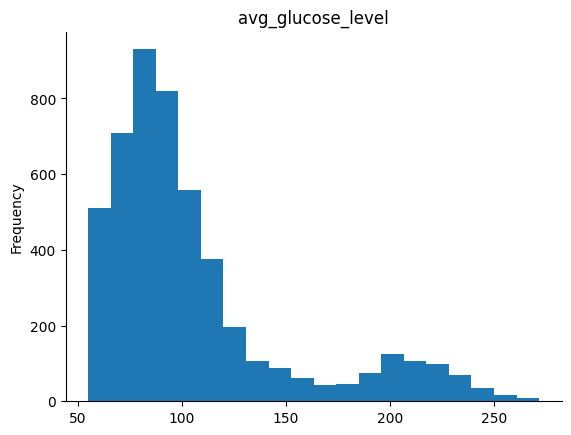

In [8]:
# @title avg_glucose_level

from matplotlib import pyplot as plt

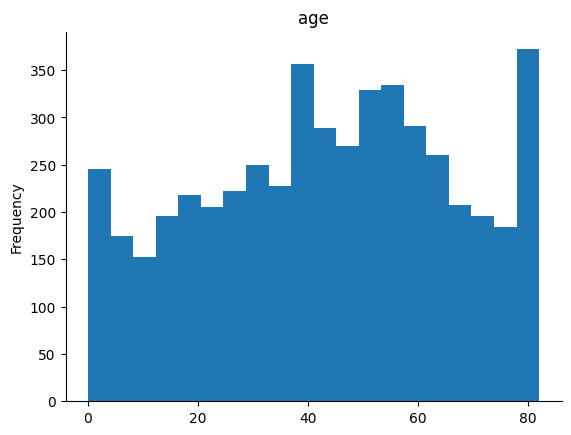

In [4]:
dataset['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

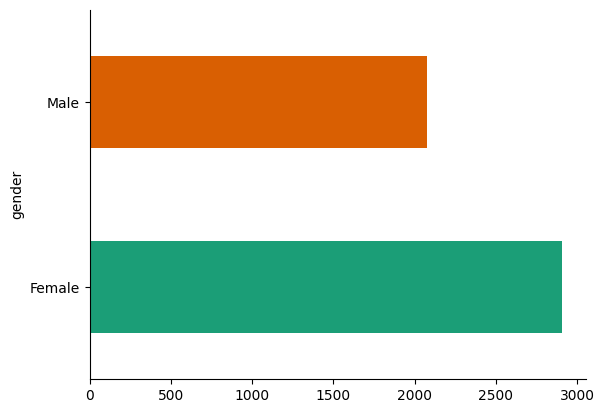

In [7]:
dataset.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

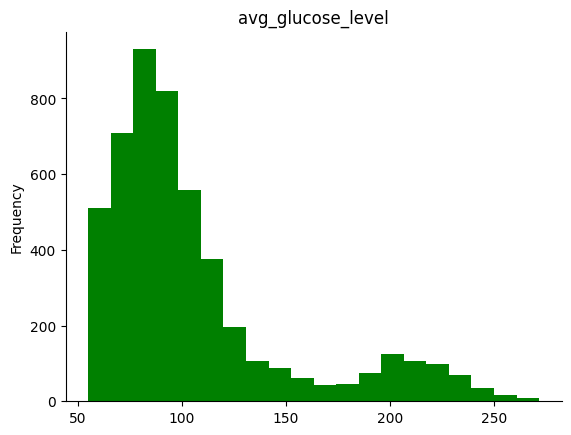

In [10]:
dataset['avg_glucose_level'].plot(kind='hist', bins=20, title='avg_glucose_level', color = 'g')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Drop Unrelated Data

In [11]:
dataset.drop(['ever_married', 'work_type', 'Residence_type'], axis= 1, inplace = True)

In [12]:
dataset

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,191.15,31.1,smokes,0
4978,Female,45.0,1,0,95.02,31.8,smokes,0
4979,Male,40.0,0,0,83.94,30.0,smokes,0


In [13]:
X = dataset.iloc[:, 0:7].values
y = dataset.iloc[:, 7]
print(X)
print(y)

[['Male' 67.0 0 ... 228.69 36.6 'formerly smoked']
 ['Male' 80.0 0 ... 105.92 32.5 'never smoked']
 ['Female' 49.0 0 ... 171.23 34.4 'smokes']
 ...
 ['Female' 45.0 1 ... 95.02 31.8 'smokes']
 ['Male' 40.0 0 ... 83.94 30.0 'smokes']
 ['Female' 80.0 1 ... 83.75 29.1 'never smoked']]
0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64


# Encode Categorical Data

In [14]:
# Gender
label_encoder = LabelEncoder()
X[:, 0] = label_encoder.fit_transform(X[:, 0])
X

array([[1, 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       [1, 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       [0, 49.0, 0, ..., 171.23, 34.4, 'smokes'],
       ...,
       [0, 45.0, 1, ..., 95.02, 31.8, 'smokes'],
       [1, 40.0, 0, ..., 83.94, 30.0, 'smokes'],
       [0, 80.0, 1, ..., 83.75, 29.1, 'never smoked']], dtype=object)

In [15]:
# BMI
bmi_mean = X[:, 5].mean()
print(bmi_mean)
X[:, 5] = np.where(X[:, 5] >= bmi_mean, 1, 0)
print(X)

28.498173057619002
[[1 67.0 0 ... 228.69 1 'formerly smoked']
 [1 80.0 0 ... 105.92 1 'never smoked']
 [0 49.0 0 ... 171.23 1 'smokes']
 ...
 [0 45.0 1 ... 95.02 1 'smokes']
 [1 40.0 0 ... 83.94 1 'smokes']
 [0 80.0 1 ... 83.75 1 'never smoked']]


In [16]:
# Smoking
col_trans = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [0])], remainder= 'passthrough')
label_encoder_sm = LabelEncoder()

smk = X[:, 6]

smk = label_encoder_sm.fit_transform(smk)
smk

array([1, 2, 3, ..., 3, 3, 2])

In [17]:
label_encoder_sm = LabelEncoder()

X[:, 6] = label_encoder_sm.fit_transform(X[:, 6])
X

array([[1, 67.0, 0, ..., 228.69, 1, 1],
       [1, 80.0, 0, ..., 105.92, 1, 2],
       [0, 49.0, 0, ..., 171.23, 1, 3],
       ...,
       [0, 45.0, 1, ..., 95.02, 1, 3],
       [1, 40.0, 0, ..., 83.94, 1, 3],
       [0, 80.0, 1, ..., 83.75, 1, 2]], dtype=object)

In [ ]:
#smk = smk.reshape(-1, 1)
#smk.shape

(4981, 1)

In [ ]:
#smk = col_trans.fit_transform(smk)

In [ ]:
#smk = smk[:, 1:]
#smk.shape

(4981, 3)

In [ ]:
#X = X[:, :6]
#X = np.concatenate((X, smk), axis = 1)

In [18]:
X

array([[1, 67.0, 0, ..., 228.69, 1, 1],
       [1, 80.0, 0, ..., 105.92, 1, 2],
       [0, 49.0, 0, ..., 171.23, 1, 3],
       ...,
       [0, 45.0, 1, ..., 95.02, 1, 3],
       [1, 40.0, 0, ..., 83.94, 1, 3],
       [0, 80.0, 1, ..., 83.75, 1, 2]], dtype=object)

In [19]:
temp_df = pd.DataFrame(X)
temp_df

,0,1,2,3,4,5,6
0,1,67.0,0,1,228.69,1,1
1,1,80.0,0,1,105.92,1,2
2,0,49.0,0,0,171.23,1,3
3,0,79.0,1,0,174.12,0,2
4,1,81.0,0,0,186.21,1,1
...,...,...,...,...,...,...,...
4976,1,41.0,0,0,70.15,1,1
4977,1,40.0,0,0,191.15,1,3
4978,0,45.0,1,0,95.02,1,3
4979,1,40.0,0,0,83.94,1,3


# Data Splitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Building ANN


In [21]:
classifier = Sequential()

classifier.add(Dense(units = 6, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))


classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

# Train ANN Model

In [23]:
hsitory = classifier.fit(X_train, y_train, batch_size = 50, epochs=150)

Epoch 1/150
75/75 [==============================] - 2s 4ms/step - loss: 5.2648 - accuracy: 0.1473
Epoch 2/150
75/75 [==============================] - 0s 4ms/step - loss: 1.4009 - accuracy: 0.5189
Epoch 3/150
75/75 [==============================] - 0s 3ms/step - loss: 0.8616 - accuracy: 0.7242
Epoch 4/150
75/75 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.8305
Epoch 5/150
75/75 [==============================] - 0s 4ms/step - loss: 0.6224 - accuracy: 0.8822
Epoch 6/150
75/75 [==============================] - 0s 4ms/step - loss: 0.5837 - accuracy: 0.9100
Epoch 7/150
75/75 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.9218
Epoch 8/150
75/75 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.9339
Epoch 9/150
75/75 [==============================] - 0s 4ms/step - loss: 0.5123 - accuracy: 0.9395
Epoch 10/150
75/75 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.9416
Epoch 11/

# Model Summary

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 48        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Learning Curve

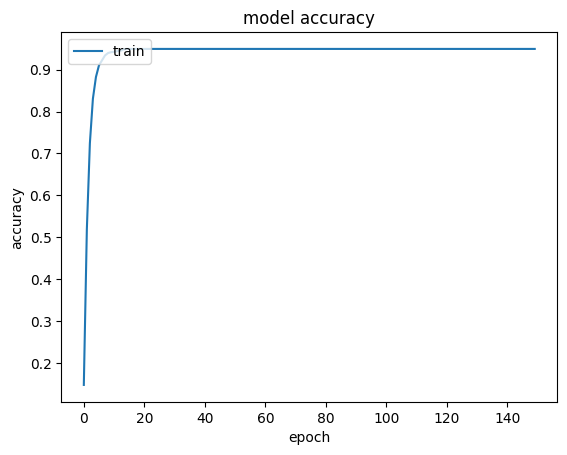

In [25]:
plt.plot(hsitory.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

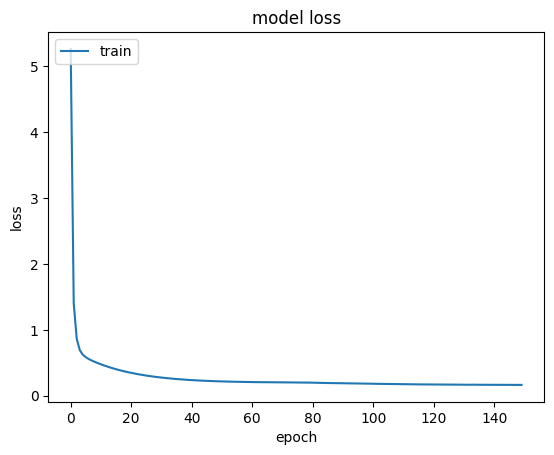

In [26]:
plt.plot(hsitory.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

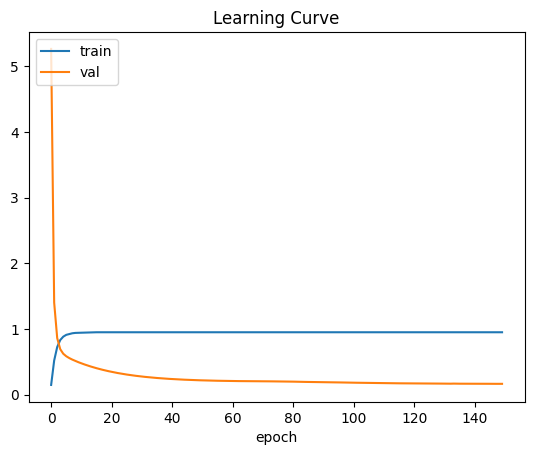

In [27]:
plt.plot(hsitory.history['accuracy'])
plt.plot(hsitory.history['loss'])
plt.title('Learning Curve')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Prediction

In [28]:
# gender	age	hypertension	heart_disease	avg_glucose_level	bmi	smoking_status
test = classifier.predict([[1, 90, 1, 1, 228.69, 1, 2]])

1/1 [==============================] - 0s 121ms/step


In [29]:
test

array([[0.49060598]], dtype=float32)

# Save Model

In [30]:
classifier.save('ANN.h5')
print("Model has been saved")

Model has been saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
